In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
np.random.seed(100)
x = np.random.random(10000)

In [3]:
pd.Series(x).describe()

count    10000.000000
mean         0.497670
std          0.289074
min          0.000015
25%          0.246283
50%          0.496123
75%          0.747692
max          0.999978
dtype: float64

### Distribution of random sampling from uniformed distribution

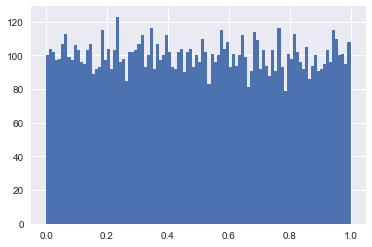

In [4]:
sns.set()
_ = plt.hist(x, bins=100)
plt.show()

## Simulation

### Probability of points for rolling two dices
np.random.choice() could also be used for bootstrapping

In [5]:
dices = []
results = []
for _ in range(10000):
    dice1 = np.random.choice(np.arange(6)) + 1
    dice2 = np.random.choice(np.arange(6)) + 1
    total = dice1 + dice2
    dices.append((dice1, dice2))
    results.append(total)
print('The expectation of rolling two dices: {}'.format(2*np.sum(np.arange(7))/6))
print('Simulation results: {}'.format(np.mean(results)))

The expectation of rolling two dices: 7.0
Simulation results: 7.0186


In [6]:
for i in np.arange(5):
    print(results[i], dices[i])

7 (5, 2)
9 (6, 3)
9 (4, 5)
3 (1, 2)
7 (5, 2)


### Visulization of simulation results

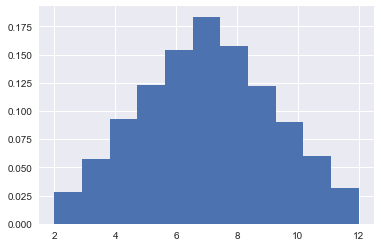

In [7]:
_ = plt.hist(results, bins=11, normed=True)
plt.show()

In [8]:
results_count = pd.Series(results).value_counts()

In [9]:
results_count.sort_index()

2      258
3      522
4      844
5     1117
6     1400
7     1668
8     1430
9     1106
10     820
11     547
12     288
dtype: int64

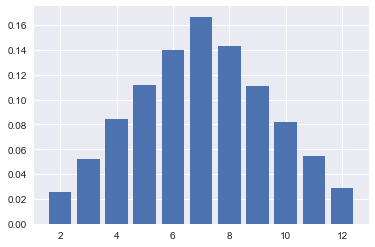

In [10]:
plt.bar(np.arange(2,13), results_count.sort_index().values/sum(results_count.values))
plt.show()

### The Binominal PMF (Probability mass function)
The set of probabilities of discrete outcomes.

In [11]:
samples = np.random.binomial(100, 0.05, size=10000)

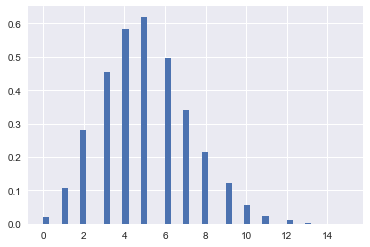

In [12]:
_ = plt.hist(samples, bins=50, normed=True)
plt.show()

## Continuous Normal Distribution
### The Normal PDF

In [13]:
x = np.random.normal(0,1,10000)

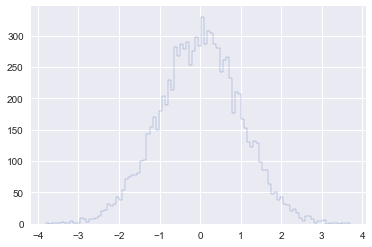

In [14]:
_ = plt.hist(x, bins=100, histtype='step')
plt.show()

### CDF - cumulative distribution functions

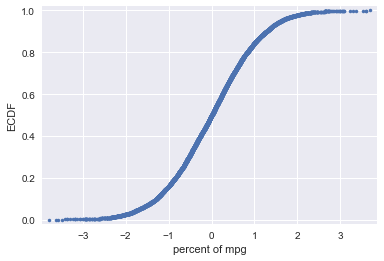

In [15]:
x = np.sort(x)
y = np.arange(1, len(x)+1) / len(x)
# use linestyle='none' to produce scatter plot in plot()
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('percent of mpg')
plt.ylabel('ECDF')
plt.margins(0.02) # keeeps data off plot edges
plt.show()

### Overlay percentiles

In [16]:
percentiles = np.percentile(x, [2.5, 25, 50, 75, 97.5])
percentiles

array([-1.99462899, -0.66226447,  0.00832092,  0.66624861,  1.94802452])

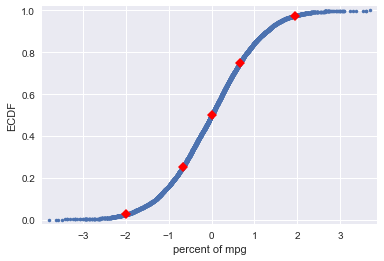

In [17]:
x = np.sort(x)
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(percentiles, [.025, .25, .5, .75, .975], marker='D', linestyle='none', color='red')
plt.xlabel('percent of mpg')
plt.ylabel('ECDF')
plt.margins(0.02) # keeeps data off plot edges
plt.show()

## Estimation
### Linear Regression

In [18]:
df = sns.load_dataset('mpg')
df_dropna = df.dropna()

In [19]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


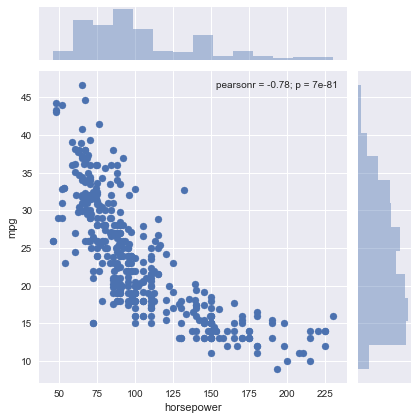

In [20]:
sns.jointplot(x='horsepower', y='mpg', data=df_dropna)
plt.show()

In [21]:
a,b = np.polyfit(df_dropna.horsepower, df_dropna.mpg , 1)
print(a,b)

-0.157844733354 39.9358610212


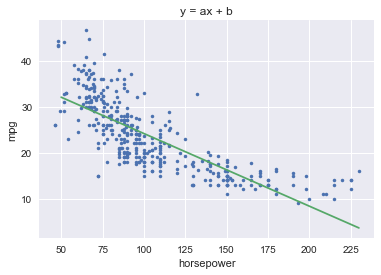

In [22]:
plt.plot(df_dropna.horsepower, df_dropna.mpg, marker='.', linestyle='none')
x = np.array([50,230])
y = a * x + b
plt.plot(x,y)
plt.xlabel('horsepower')
plt.ylabel('mpg') 
plt.title('y = ax + b')
plt.show()

In [23]:
a1, a2, b = np.polyfit(df_dropna.horsepower, df_dropna.mpg , 2)
print(a1, a2, b)

0.00123053610077 -0.466189629947 56.9000997021


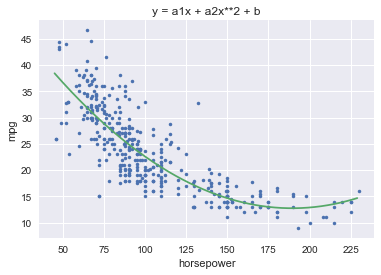

In [24]:
x = np.arange(45, 230)
y = a2 * x + a1 * x**2 + b
plt.plot(df_dropna.horsepower, df_dropna.mpg, marker='.', linestyle='none')
plt.plot(x,y)
plt.xlabel('horsepower')
plt.ylabel('mpg') 
plt.title('y = a1x + a2x**2 + b')
plt.show()

## Bootstrapping

In [25]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


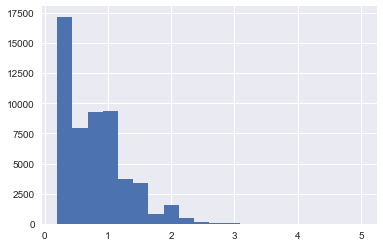

In [26]:
_ = plt.hist(df.carat, bins=20)
plt.show()

In [27]:
def bootstrapping(data, func, size):
    bootstraps = np.empty(size)    
    for i in range(size):
        bootstrap = np.random.choice(data, size=len(data))
        output = func(bootstrap)
        bootstraps[i] = output
    
    return(bootstraps)    

In [28]:
carat_means = bootstrapping(df.carat, np.mean, 1000)

In [29]:
carat_means[:10]

array([ 0.79477234,  0.79609937,  0.79481739,  0.79716073,  0.80176604,
        0.79869114,  0.79958676,  0.8009644 ,  0.79879347,  0.79332017])

#### The mean of carat is normally distributed even though the distribution of the original samples is not.

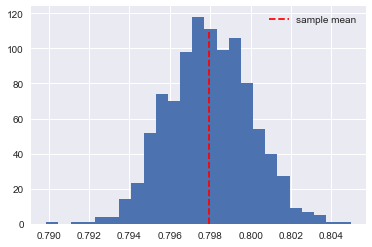

In [30]:
_ = plt.hist(carat_means, bins=25)
sample_mean = np.mean(df.carat)
plt.vlines(sample_mean, 0, 110, color='red', linestyles='dashed', label='sample mean')
plt.legend()
plt.show()

In [31]:
ci1, ci2 = np.percentile(carat_means, [2.5, 97.5])
print("The 95% confidence interval for the mean of carat is: {}, {}".format(ci1, ci2))

The 95% confidence interval for the mean of carat is: 0.7941238274008159, 0.8018408972932889
